## EDA (Exploratory Data Analysis on Tatanic Dataset)

### Dataset link:
- Titanic Dataset
- https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [2]:
# import libaries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


In [3]:
# Upload the dataset

df = pd.read_csv("Titanic-Dataset.csv")

df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Step_01: Labels the features/columsn 

#### 1. univariate analysis
- Use univariate analysis for Numerical features

- 1. To identify the shape

- 2. Central Tendency of data
    - mean, median 

- 3. Disperatioin of data
    - variance, standard derivation, IQR(Q3-Q1)

#### 1. To identify the shape

In [3]:
# Basic infor about row, columns and data type

# See the shape to understand how many rows 
df.shape

(891, 12)

- For this dataset
    - there are 891 rows and 12 columns

In [4]:
# To see the columns and it's data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Explaination:

- for this dataset
    - Total number of features/column => 12
    
    - 1. Numerical columns

        - PassengerId 
            - [- Data format:  1, 2, 3, ..., and so on]

        - Survived 
            - meaning : Survival indicator

            [- Data format: 0 and 1]

        - Pclass 
            - meaning : Passenger’s travel class

            [ - Data format: 1, 2, and 3]

        - SibSp 
            - meaning: Number of siblings + spouses travelling with the passenger.

            [ - Data format: 0, 1, 2,...and so on]

        - Parch 
            - Meaning: Number of parents + children travelling with the passenger.

            - [ - Data format: 0,1,2,.... so on]

        - Fare
            - Meaning: Ticket fare paid.

            - [- Data format: 7.25, 71.28, 255.33 ..... and so on]
    
    - 2. Categorical Columns
        - Name
            - [- Data format: Mrs. Jacques Heath (Lily May Peel)]

        - Sex
            - Meaning : Gender of the Passenger

            - [- Data Format: male, female]

        - Ticket
            - Meaning: Ticket number
            
            - [ - Data format: PC 17599, A/5 21171 and so on]

        - Cabin
            - Meaning: Cabin number

            - [ - Data format: C85, C123 and so on]

        - Embarked:
            - Meaning: boarding port 

            - [- Data format: C, Q, S]


- Note: 
    - Here are some features that belong to Numerical but actually act as categorical such as

    - 1. Pclass

        - Values: 1, 2, 3

        - Meaning: passenger’s ticket class (1st, 2nd, 3rd)

        - Acts as: Ordinal categorical feature

        - Should NOT be treated as a continuous variable.

    - 2. SibSp

        - Values: 0, 1, 2, 3, 4, 5, 8

        - Meaning: number of siblings/spouses aboard

        - Even though numeric, it behaves like a count-based category.

        - Often used to create categorical groups (alone / small family / big family)

    - 3. Parch

        - Values: 0, 1, 2, 3, 4, 5, 6

        - Similar to SibSp → behaves like discrete family-size categories

    
    - 4. Survived (Target)

        - Values: 0, 1

        - It is technically numeric, but conceptually binary categorical.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2 and 3. Central Tendency of data an Disperatioin of data

    - use: df.describe()

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
# for check the nunique of value of each column for determine which columns are numerical and categorcal
print("Total Column: ", df.shape)
df.nunique()

# nunique() -> Counting unique values

Total Column:  (891, 12)


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

- Now Label or select the columns

- 1. Numerical columns: 
    - PassengerId, Age, Fare

    - less important: PassengerId

- 2. Categorical Column:
    - Survived, Sex, Pclass, Name, SibSp, Parch, Ticket, Cabin, Embarked

    - less important: Name, Ticket, Cabin

- 3. Target column:
    - Survived


-  Disperatioin of data

    - Survive column 0.383838 or almost 38% passenger can survived.

    - Age column 29.699118 or 29% ages passenger on average are not survied.

In [10]:
# Label the features

numerical_cols = ['Age', 'Fare']

categorical_cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

target_col = ['Survived']

print("Numerical Features: ", numerical_cols)

print("Categorical Features: ", categorical_cols)

print("Target Features: ", target_col)


Numerical Features:  ['Age', 'Fare']
Categorical Features:  ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
Target Features:  ['Survived']


#### check the missing value of each features

- Two ways to handle missing value

- 1. Handlde case one: drop
    - if a column has 70% missing value then we drop the column
 
- 2. Handle Missing value case two: fill
    - fill with (median, mean, mode)
   

In [13]:
### check the missing value in entire dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Calculate Missing % Per Numerical Column
df[numerical_cols].isnull().sum()/len(df) * 100

Age     19.86532
Fare     0.00000
dtype: float64

In [25]:
# Calculate Missing % Per Categorical Column

df[categorical_cols].isnull().sum()/len(df) * 100

Sex         0.000000
Pclass      0.000000
SibSp       0.000000
Parch       0.000000
Embarked    0.224467
dtype: float64

In [26]:
# Calculate Missing % Per Target Column

df[target_col].isnull().sum()/len(df) * 100

Survived    0.0
dtype: float64

- Conclusion:
    - Select or labels or each features are correct

### 2. Visualizations

In [42]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use("default")

plt.style.use("default")

sns.set(font_scale = 1.1)

#### Visualizations of numerical columns

In [27]:
numerical_cols

['Age', 'Fare']

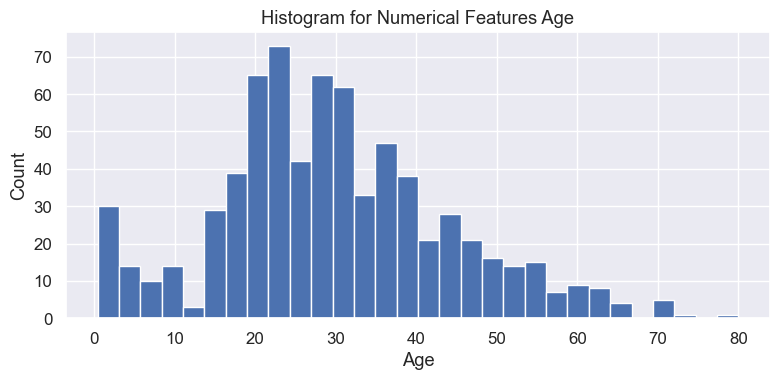

In [44]:
# histogram for sinlge column (Age)

df['Age'].hist(bins = 30, figsize=(8,4))

plt.title("Histogram for Numerical Features Age")

plt.xlabel("Age")

plt.ylabel("Count")

plt.tight_layout()

plt.show()

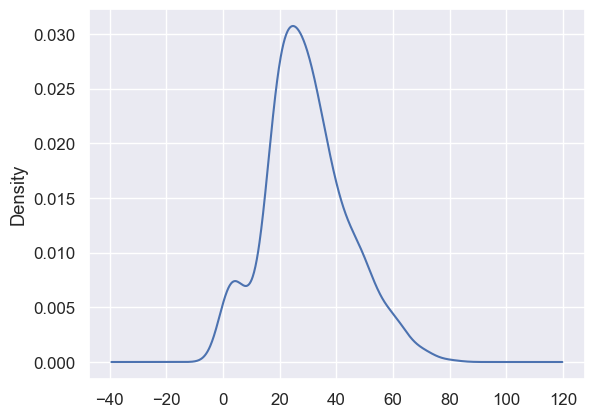

In [48]:
# kde plot

df['Age'].plot(kind = 'kde')

plt.show()

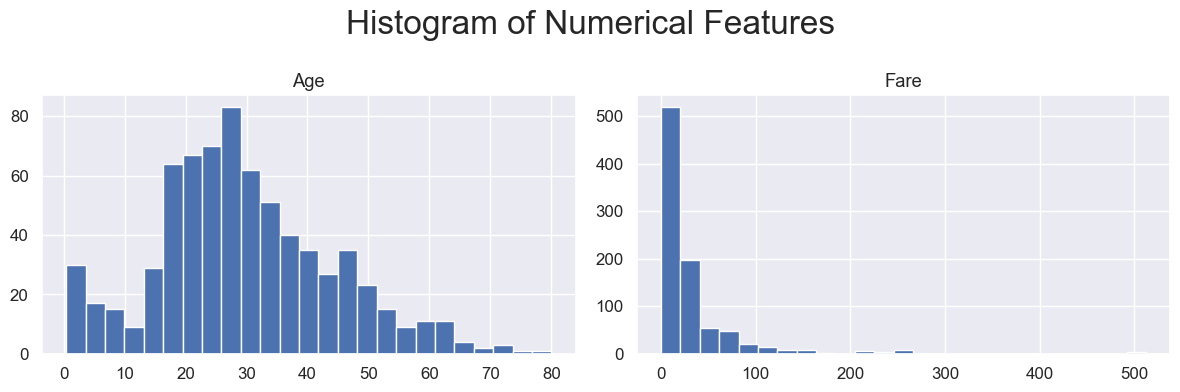

In [61]:
# Histogram and kde plot for multiple numerical columns

df[numerical_cols].hist(bins=25, figsize=(12,4))

plt.suptitle("Histogram of Numerical Features", fontsize = 24)

plt.tight_layout()

plt.show()

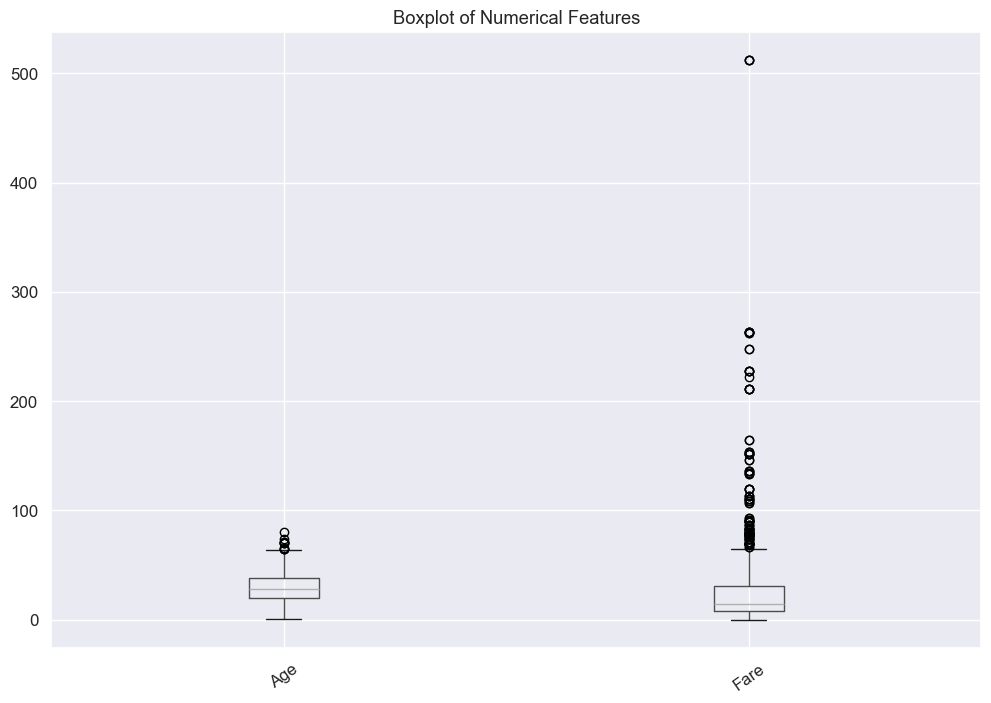

In [62]:
# Boxplot for multiple numerical features

plt.figure(figsize = (12,8))

df[numerical_cols].boxplot()

plt.title("Boxplot of Numerical Features")

plt.xticks(rotation = 35)
plt.show()

In [ ]:
# Age colum

df[df['Age'] > 75]

# we can see, the Age column is not outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [ ]:
# Age colum

df[df['Fare'] > 275]

# we can see, the Age column is not outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


- Conclusion:
    - Skewness
        - Age datasets (column) are Symmetric(almost) Distribution

        - Fare column are Right Skew (highly)
        
    - Outliers:
        - Age colum are No outliers
        
        - Fare colum exist outliers